# Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

raw_train = pd.read_csv("train.csv")
raw_test = pd.read_csv("test.csv")

raw_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [ ]:
print('Pclass')
print('Range: ' + str(raw_train['Pclass'].min()) + '-' + str(raw_train['Pclass'].max()))
print('Missing Values: ' + str(raw_train['Pclass'].hasnans))
print()
print('Sex')
print('Missing Values: ' + str(raw_train['Sex'].hasnans))
print()
print('Age')
print('Range: ' + str(raw_train['Age'].min()) + '-' + str(raw_train['Age'].max()))
print('Missing Values: ' + str(raw_train['Age'].hasnans))
print()
print('SibSp')
print('Range: ' + str(raw_train['SibSp'].min()) + '-' + str(raw_train['SibSp'].max()))
print('Missing Values: ' + str(raw_train['SibSp'].hasnans))
print()
print('Parch')
print('Range: ' + str(raw_train['Parch'].min()) + '-' + str(raw_train['Parch'].max()))
print('Missing Values: ' + str(raw_train['Parch'].hasnans))
print()
print('Fare')
print('Range: ' + str(raw_train['Fare'].min()) + '-' + str(raw_train['Fare'].max()))
print('Missing Values: ' + str(raw_train['Fare'].hasnans))
print()
print('Embarked')
print('Values: ' + str(raw_train['Embarked'].unique()))
print('Missing Values: ' + str(raw_train['Embarked'].hasnans))

Pclass
Range: 1-3
Missing Values: False

Sex
Missing Values: False

Age
Range: 0.42-80.0
Missing Values: True

SibSp
Range: 0-8
Missing Values: False

Parch
Range: 0-6
Missing Values: False

Fare
Range: 0.0-512.3292
Missing Values: False

Embarked
Values: ['S' 'C' 'Q' nan]
Missing Values: True


# Preprocessing

In [3]:
def transform(data):
  pclass1 = data['Pclass'].map({1:1,2:0,3:0})
  pclass2 = data['Pclass'].map({1:0,2:1,3:0})
  titles = ["Mr", "Miss", "Mrs", "Master"]
  title = data['Name'].str.extract(r"([A-Za-z]+)\.", expand=False)
  title.replace(["Ms", "Mlle", "Mme"], "Miss", inplace=True)
  title.replace(["Lady"], "Mrs", inplace=True)
  title.replace(["Sir", "Rev"], "Mr", inplace=True)
  title[~title.isin(titles)] = "Others"
  title1 = title.map({'Mr':1,'Miss':0,'Mrs':0,'Master':0,'Others':0,np.nan:0})
  title2 = title.map({'Mr':0,'Miss':1,'Mrs':0,'Master':0,'Others':0,np.nan:0})
  title3 = title.map({'Mr':0,'Miss':0,'Mrs':1,'Master':0,'Others':0,np.nan:0})
  title4 = title.map({'Mr':0,'Miss':0,'Mrs':0,'Master':1,'Others':0,np.nan:0})
  sex = data['Sex'].map({'male':0,'female':1,np.nan:0})
  age = data['Age'].fillna(data['Age'].mean())
  family = data['SibSp'] + data['Parch']
  fare = data['Fare'].fillna(0)
  embarkedS = data['Embarked'].map({'S':1,'C':0,'Q':0,np.nan:1})
  embarkedC = data['Embarked'].map({'S':0,'C':1,'Q':0,np.nan:0})
  cleaned = pd.DataFrame({'Pclass1':pclass1,'Pclass2':pclass2,'Title1':title1,'Title2':title2,'Title3':title3,'Title4':title4,'Sex':sex,'Age':age,'Family':family,'Fare':fare,'EmbarkedS':embarkedS,'EmbarkedC':embarkedC})
  sc = StandardScaler();
  standardized = sc.fit_transform(cleaned)
  return standardized

transform(raw_train)

array([[-0.56568542, -0.51015154,  0.83688809, ..., -0.50244517,
         0.61583843, -0.48204268],
       [ 1.76776695, -0.51015154, -1.19490289, ...,  0.78684529,
        -1.62380254,  2.0745051 ],
       [-0.56568542, -0.51015154, -1.19490289, ..., -0.48885426,
         0.61583843, -0.48204268],
       ...,
       [-0.56568542, -0.51015154, -1.19490289, ..., -0.17626324,
         0.61583843, -0.48204268],
       [ 1.76776695, -0.51015154,  0.83688809, ..., -0.04438104,
        -1.62380254,  2.0745051 ],
       [-0.56568542, -0.51015154,  0.83688809, ..., -0.49237783,
        -1.62380254, -0.48204268]])

In [4]:
def transform_target(data):
    return data['Survived'].map({0:-1,1:1}).to_numpy();

transform_target(raw_train)

array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1

# Training

In [5]:
def train(data,target,kernel,C):
  svm = SVC(kernel=kernel,C=C)
  svm.fit(data,target)
  return svm

# Testing

In [6]:
def test(data,target,svm):
  return svm.score(data,target)

# Evaluation

<Axes: >

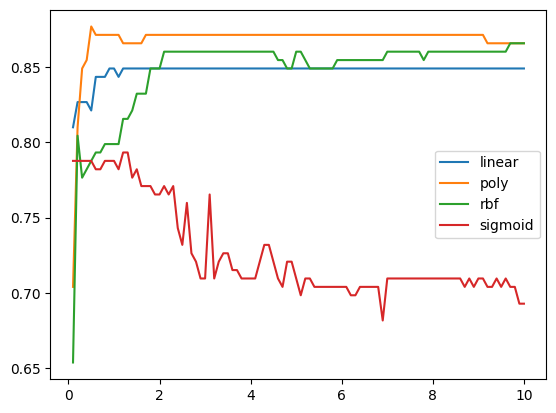

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(transform(raw_train),transform_target(raw_train), test_size=.2)
kernels = ['linear','poly','rbf','sigmoid',]
indexes = [i/10 for i in range(1,101)]
data = []
for i in indexes:
  d = []
  for k in kernels:
    model = train(Xtrain,Ytrain,kernel=k,C=i/10)
    d += [test(Xtest,Ytest,model)]
  data += [d]
results = pd.DataFrame(data=data,index=indexes,columns=kernels)
results.plot.line()

# Prediction

In [11]:
def predict(data,model,ids):
  survived = pd.Series(model.predict(data)).map({-1:0,1:1})
  return pd.DataFrame({'PassengerId':ids,'Survived':survived})

In [13]:
sigmodel = train(transform(raw_train),transform_target(raw_train),kernel='sigmoid',C=1)
sigout = predict(transform(raw_test),sigmodel,raw_test['PassengerId'])

linearmodel = train(transform(raw_train),transform_target(raw_train),kernel='linear',C=1)
linearout = predict(transform(raw_test),linearmodel,raw_test['PassengerId'])

rbfmodel = train(transform(raw_train),transform_target(raw_train),kernel='rbf',C=2)
rbfout = predict(transform(raw_test),rbfmodel,raw_test['PassengerId'])

polymodel = train(transform(raw_train),transform_target(raw_train),kernel='poly',C=1)
polyout = predict(transform(raw_test),polymodel,raw_test['PassengerId'])
polyout

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [14]:
polyout.to_csv('SVMpoly.csv', index = False)
rbfout.to_csv('SVMrbf.csv', index = False)
linearout.to_csv('SVMlinear.csv', index = False)
sigout.to_csv('SVMsig.csv', index = False)